# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [69]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")
#na_values='Does not apply'

In [70]:
df.head(3)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [71]:
df.shape

(81937, 15)

In [72]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values='Unknown', nrows=30000)

In [73]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [74]:
print("Each row is a dog registered in New York City.\nThe data includes details such as name, breed, \nvaccination status of the pet.")

print("The animal name column has the pet's name. \nThe Animal Gender column has its gender.")

Each row is a dog registered in New York City.
The data includes details such as name, breed, 
vaccination status of the pet.
The animal name column has the pet's name. 
The Animal Gender column has its gender.


# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [75]:
# I would like to know:
# 1. The average gap between license application date and issue date to know how long it takes to get a license
# 2. How many male dogs are in the city?
# 3. How many black dogs are there?
# 4. From the owner zip code data, I want to know which parts of the city have the most and least dogs

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

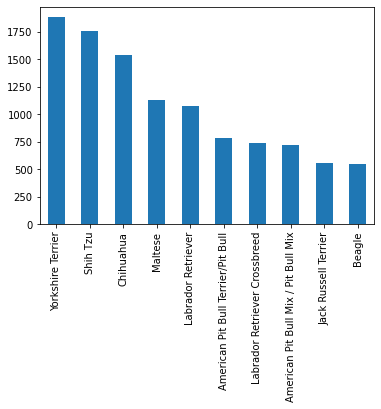

In [76]:
df["Primary Breed"].value_counts().head(10).plot(kind='bar')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [77]:
# Went back up and removed unknown to make this work

## What are the most popular dog names?

In [78]:
df["Animal Name"].value_counts().head(10)

UNKNOWN    203
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [82]:
df[df['Animal Name']=='Max'].count()

Owner Zip Code            202
Animal Name               202
Animal Gender             202
Primary Breed             163
Secondary Breed            33
Animal Dominant Color     202
Animal Secondary Color    140
Animal Third Color         46
Animal Birth              202
Spayed or Neut            202
Guard or Trained          136
Vaccinated                202
Application Date          202
License Issued Date       202
License Expired Date      202
dtype: int64

In [83]:
df[df['Animal Name']=='Maxwell'].count()

Owner Zip Code            11
Animal Name               11
Animal Gender             11
Primary Breed              9
Secondary Breed            2
Animal Dominant Color     11
Animal Secondary Color     8
Animal Third Color         4
Animal Birth              11
Spayed or Neut            11
Guard or Trained           6
Vaccinated                11
Application Date          11
License Issued Date       11
License Expired Date      11
dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [84]:
df["Guard or Trained"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

No     99.9%
Yes     0.1%
Name: Guard or Trained, dtype: object

## What are the actual numbers?

In [85]:
df["Guard or Trained"].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [86]:
df["Guard or Trained"].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [87]:
import numpy as np

In [94]:
df["Guard or Trained"] = df["Guard or Trained"].replace({np.nan: 'No'})

In [96]:
df["Guard or Trained"].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [116]:
# df.groupby(['Primary Breed']).sum(["Guard or Trained"])
# df.groupby(['Primary Breed']).sum(guard_dogs)

guard_dogs = df[df["Guard or Trained"]== 'Yes']
guard_dogs.groupby(["Primary Breed"])["Primary Breed"].value_counts().sort_values(ascending=False).head(3)

Primary Breed               Primary Breed             
German Shepherd Dog         German Shepherd Dog           3
Doberman Pinscher           Doberman Pinscher             1
German Shepherd Crossbreed  German Shepherd Crossbreed    1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [118]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [119]:
dog_age = 2021 - df["year"]

df['age'] = dog_age
df.head(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,8


# Joining data together

In [ ]:
# no

In [120]:
df_neighborhoods = pd.read_csv("zipcodes-neighborhoods.csv")

In [121]:
df_neighborhoods.head(2)

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [125]:
merged = df.merge(df_neighborhoods, left_on='Owner Zip Code', right_on='zip')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,10024,Manhattan


## What is the most common dog breed in each of the neighborhoods of NYC?

In [133]:
merged.groupby(by='neighborhood')['Primary Breed'].value_counts()

neighborhood  Primary Breed              
Borough Park  Yorkshire Terrier              49
              Maltese                        34
              Shih Tzu                       34
              Chihuahua                      32
              Labrador Retriever             19
                                             ..
West Queens   Soft Coated Wheaten Terrier     1
              Tibetan Spaniel                 1
              Toy Fox Terrier                 1
              Weimaraner                      1
              Wire Fox Terrier                1
Name: Primary Breed, Length: 3987, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

## How many dogs are in each borough? Plot it in a graph.

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?